### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os.path,sys
%matplotlib inline

In [2]:
# Load telecom data file
telecom_orig = pd.read_csv('telecom_churn_data.csv', low_memory=False)
telecom_orig.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

In [3]:
# Understand the properties of loaded dataframe
print('Dataframe Shape: ', telecom_orig.shape);
print("Dataframe Info: \n"); telecom_orig.info();
telecom_orig.head(5)

Dataframe Shape:  (99999, 226)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

### Step1: Data cleanup and imputation

In [4]:
date_col_list= ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8","last_date_of_month_6","last_date_of_month_7","last_date_of_month_8"]
print(telecom_orig[date_col_list].head())


print(round(100*(telecom_orig[date_col_list].isnull().sum()/len(telecom_orig.index)), 2))
print(telecom_orig[date_col_list].nunique())
telecom_orig.last_date_of_month_6.fillna(value='6/30/2014',inplace=True)
telecom_orig.last_date_of_month_7.fillna(value='7/31/2014',inplace=True)
telecom_orig.last_date_of_month_8.fillna(value='8/31/2014',inplace=True)
telecom_orig.date_of_last_rech_6.fillna(value='6/1/2014',inplace=True)
telecom_orig.date_of_last_rech_7.fillna(value='7/1/2014',inplace=True)
telecom_orig.date_of_last_rech_8.fillna(value='8/1/2014',inplace=True)
print(round(100*(telecom_orig[date_col_list].isnull().sum()/len(telecom_orig.index)), 2))
print(telecom_orig[date_col_list].isnull().sum())

  date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/21/2014           7/16/2014            8/8/2014   
1           6/29/2014           7/31/2014           8/28/2014   
2           6/17/2014           7/24/2014           8/14/2014   
3           6/28/2014           7/31/2014           8/31/2014   
4           6/26/2014           7/28/2014            8/9/2014   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  
0            6/30/2014            7/31/2014            8/31/2014  
1            6/30/2014            7/31/2014            8/31/2014  
2            6/30/2014            7/31/2014            8/31/2014  
3            6/30/2014            7/31/2014            8/31/2014  
4            6/30/2014            7/31/2014            8/31/2014  
date_of_last_rech_6     1.61
date_of_last_rech_7     1.77
date_of_last_rech_8     3.62
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
dtype: float64
date_of_last_rech_

In [5]:
# covert date columns to python datetime format
date_col_list= ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8","last_date_of_month_6","last_date_of_month_7","last_date_of_month_8"]
print(telecom_orig[date_col_list].head())

# convert to datetime
for col in date_col_list:
    telecom_orig[col] = pd.to_datetime(telecom_orig[col])

print(telecom_orig[date_col_list].info())
print(telecom_orig[date_col_list].head())

telecom_orig["rech_days_left_6"]      = (telecom_orig.last_date_of_month_6 - telecom_orig.date_of_last_rech_6).astype('timedelta64[D]')
telecom_orig["rech_days_left_7"]      = (telecom_orig.last_date_of_month_7 - telecom_orig.date_of_last_rech_7).astype('timedelta64[D]')
telecom_orig["rech_days_left_8"]      = (telecom_orig.last_date_of_month_8 - telecom_orig.date_of_last_rech_8).astype('timedelta64[D]')

print('Dataframe Shape: ', telecom_orig.shape)

  date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/21/2014           7/16/2014            8/8/2014   
1           6/29/2014           7/31/2014           8/28/2014   
2           6/17/2014           7/24/2014           8/14/2014   
3           6/28/2014           7/31/2014           8/31/2014   
4           6/26/2014           7/28/2014            8/9/2014   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  
0            6/30/2014            7/31/2014            8/31/2014  
1            6/30/2014            7/31/2014            8/31/2014  
2            6/30/2014            7/31/2014            8/31/2014  
3            6/30/2014            7/31/2014            8/31/2014  
4            6/30/2014            7/31/2014            8/31/2014  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
date_of_last_rech_6     99999 non-null datetime64[ns]
date_of_last_rech_7     99999 non-null dateti

In [6]:
# Drop columns that are not relevant
telecom_orig = telecom_orig.drop(['date_of_last_rech_6',  'date_of_last_rech_7', 'date_of_last_rech_8',
'last_date_of_month_7',
'last_date_of_month_8',
'last_date_of_month_9',
'onnet_mou_6',
'roam_ic_mou_6',
'loc_og_t2t_mou_7',
'loc_ic_t2t_mou_6',
'spl_ic_mou_6',
'night_pck_user_6',
'fb_user_6',
'onnet_mou_7',
'roam_ic_mou_7',
'loc_og_t2t_mou_8',
'loc_ic_t2t_mou_7',
'spl_ic_mou_7',
'night_pck_user_7',
'fb_user_7',
'onnet_mou_8',
'roam_ic_mou_8',
'loc_og_t2t_mou_9',
'loc_ic_t2t_mou_8',
'spl_ic_mou_8',
'night_pck_user_8',
'fb_user_8',
'onnet_mou_9',
'roam_ic_mou_9',
'loc_og_t2m_mou_6',
'loc_ic_t2t_mou_9',
'spl_ic_mou_9',
'night_pck_user_9',
'fb_user_9',
'offnet_mou_6',
'roam_og_mou_6',
'loc_og_t2m_mou_7',
'loc_ic_t2m_mou_6',
'isd_ic_mou_6',
'offnet_mou_7',
'roam_og_mou_7',
'loc_og_t2m_mou_8',
'loc_ic_t2m_mou_7',
'isd_ic_mou_7',
'offnet_mou_8',
'roam_og_mou_8',
'loc_og_t2m_mou_9',
'loc_ic_t2m_mou_8',
'isd_ic_mou_8',
'offnet_mou_9',
'roam_og_mou_9',
'loc_og_t2f_mou_6',
'loc_ic_t2m_mou_9',
'isd_ic_mou_9',
'loc_og_t2f_mou_7',
'loc_og_t2f_mou_8',
'loc_og_t2f_mou_9',
'loc_og_t2c_mou_6',
'loc_og_t2c_mou_7',
'loc_og_t2c_mou_8',
'loc_og_t2c_mou_9',
'loc_og_mou_6',
'loc_og_mou_7',
'loc_og_mou_8',
'loc_og_mou_9',
'std_og_t2t_mou_6',
'std_og_t2t_mou_7',
'std_og_t2t_mou_8',
'std_og_t2t_mou_9',
'std_og_t2m_mou_6',
'std_og_t2m_mou_7',
'std_og_t2m_mou_8',
'std_og_t2m_mou_9',
'std_og_t2f_mou_6',
'std_og_t2f_mou_7',
'std_og_t2f_mou_8',
'std_og_t2f_mou_9',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
'std_og_t2c_mou_9',
'std_og_mou_6',
'std_og_mou_7',
'std_og_mou_8',
'std_og_mou_9',
'isd_og_mou_6',
'isd_og_mou_7',
'isd_og_mou_8',
'isd_og_mou_9',
'spl_og_mou_6',
'spl_og_mou_7',
'spl_og_mou_8',
'spl_og_mou_9',
'og_others_6',
'og_others_7',
'og_others_8',
'og_others_9',
'loc_ic_t2f_mou_6',
'loc_ic_t2f_mou_7',
'loc_ic_t2f_mou_8',
'loc_ic_t2f_mou_9',
'loc_ic_mou_6',
'loc_ic_mou_7',
'loc_ic_mou_8',
'loc_ic_mou_9',
'std_ic_t2t_mou_6',
'std_ic_t2t_mou_7',
'std_ic_t2t_mou_8',
'std_ic_t2t_mou_9',
'std_ic_t2m_mou_6',
'std_ic_t2m_mou_7',
'std_ic_t2m_mou_8',
'std_ic_t2m_mou_9',
'std_ic_t2f_mou_6',
'std_ic_t2f_mou_7',
'std_ic_t2f_mou_8',
'std_ic_t2f_mou_9',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7',
'std_ic_t2o_mou_8',
'std_ic_t2o_mou_9',
'std_ic_mou_6',
'std_ic_mou_7',
'std_ic_mou_8',
'std_ic_mou_9',
'ic_others_6',
'ic_others_7',
'ic_others_8', 
'last_date_of_month_6',
'circle_id',
'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou', 'ic_others_9', 'loc_og_t2t_mou_6'], 1)


In [7]:
#Check the new shape
telecom_orig.shape

(99999, 94)

In [8]:
## Check data types for columns
telecom_orig.dtypes


mobile_number            int64
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
arpu_9                 float64
total_og_mou_6         float64
total_og_mou_7         float64
total_og_mou_8         float64
total_og_mou_9         float64
total_ic_mou_6         float64
total_ic_mou_7         float64
total_ic_mou_8         float64
total_ic_mou_9         float64
total_rech_num_6         int64
total_rech_num_7         int64
total_rech_num_8         int64
total_rech_num_9         int64
total_rech_amt_6         int64
total_rech_amt_7         int64
total_rech_amt_8         int64
total_rech_amt_9         int64
max_rech_amt_6           int64
max_rech_amt_7           int64
max_rech_amt_8           int64
max_rech_amt_9           int64
date_of_last_rech_9     object
last_day_rch_amt_6       int64
last_day_rch_amt_7       int64
last_day_rch_amt_8       int64
last_day_rch_amt_9       int64
                        ...   
arpu_3g_8              float64
arpu_3g_

In [9]:
## Explore how many null values are in each column of the dataset 
telecom_orig.isnull().sum()

mobile_number              0
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
total_og_mou_6             0
total_og_mou_7             0
total_og_mou_8             0
total_og_mou_9             0
total_ic_mou_6             0
total_ic_mou_7             0
total_ic_mou_8             0
total_ic_mou_9             0
total_rech_num_6           0
total_rech_num_7           0
total_rech_num_8           0
total_rech_num_9           0
total_rech_amt_6           0
total_rech_amt_7           0
total_rech_amt_8           0
total_rech_amt_9           0
max_rech_amt_6             0
max_rech_amt_7             0
max_rech_amt_8             0
max_rech_amt_9             0
date_of_last_rech_9     4760
last_day_rch_amt_6         0
last_day_rch_amt_7         0
last_day_rch_amt_8         0
last_day_rch_amt_9         0
                       ...  
arpu_3g_8              73660
arpu_3g_9              74077
arpu_2g_6              74846
arpu_2g_7     

In [10]:
#Check how many rows have null values
telecom_orig.loc[telecom_orig.isnull().any(axis=1)]

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  total_og_mou_6  \
0         7000842753   197.385   214.816   213.803   21.100            0.00   
1         7001865778    34.047   355.074   268.321   86.285           40.31   
2         7001625959   167.690   189.058   210.226  290.714          155.33   
3         7001204172   221.338   251.102   508.054  389.500          223.23   
4         7000142493   261.636   309.876   238.174  163.426          127.28   
5         7000286308    50.258    58.810    83.386  170.826           69.44   
6         7001051193   429.023   190.704   255.114  114.751          333.76   
7         7000701601  1069.180  1349.850  3171.480  500.000          487.53   
8         7001524846   378.721   492.223   137.362  166.787          508.36   
9         7001864400   119.518   247.435   170.231  160.042           98.04   
10        7000471350     0.400     0.000   281.858   82.638            0.13   
11        7002006969   298.126    21.000   131.617    0.000          599.23   
12        7001419799    48.570   120.874    80.498   39.660           43.48   
13        7002191713   492.846   205.671   593.260  322.732          907.09   
14        7001654241    63.611    36.634    63.241   55.577           49.48   
15        7002070365    31.000   510.465   590.643  510.390            0.00   
16        7000875565   430.975   299.869   187.894  206.490          346.81   
17        7000187447   690.008    18.980    25.499  257.583         1249.53   
18        7001678155     4.000    75.336    60.543   32.716            2.76   
19        7001754084   163.430   241.218   326.920   75.229            4.56   
20        7001028254   271.699   421.474   364.251  241.434          271.26   
21        7002124215   514.453   597.753   637.760  578.596          860.34   
22        7001121249   281.076    26.291     0.000    0.300          425.11   
23        7000887461    74.350   193.897   366.966  811.480          134.38   
24        7001125315   422.050   359.730   354.793  473.030          564.63   
25        7000852702   244.436   285.403   172.773  161.284          416.53   
26        7000335166     0.010   130.414    22.088  133.878            0.00   
27        7000577351   -18.326    65.000   140.126   85.234           73.29   
28        7001604038   117.392    85.967   109.042   36.900           69.76   
29        7000039512   147.460    22.460     0.000    0.100          168.99   
...              ...       ...       ...       ...      ...             ...   
99966     7000782673    98.797   105.224   102.460  118.065          114.38   
99967     7002063462    92.441   102.956    67.382  137.680          104.59   
99968     7000160195   178.824   138.890   107.990   70.683          139.91   
99969     7002291416   124.787     0.000     0.000   68.352            1.86   
99970     7001386760   261.269   410.614   290.851  330.963          288.54   
99971     7002204737   150.791   160.752   177.196  189.066          232.18   
99972     7001594727     0.020     0.000   129.377  128.200            0.00   
99973     7001606779   140.855   101.238   113.389  376.359          161.51   
99974     7001453306   414.303   321.093   371.016  306.689          451.24   
99975     7002215987    82.203    56.124    62.999   32.875           73.36   
99976     7000452124   155.010   235.991   190.527  266.802          113.13   
99977     7002244886    30.914   131.998   199.714  221.887           16.58   
99978     7000668515    30.000    31.000  2411.850    0.000            0.00   
99979     7002083924    40.890    40.401    39.480   36.680           56.29   
99980     7001881483   581.397    43.663   262.890  824.724          970.89   
99981     7000630859   384.316   255.405   393.474   94.080          134.81   
99982     7001013055   452.621     0.000   110.066  874.781           28.38   
99983     7000191543   205.227   151.684     0.000    0.000          113.71   
99985     7002373887   144.590    38.250     3.447   74.5

In [11]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom_orig.isnull().sum()/len(telecom_orig.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [12]:
### Treat missing values
## Columns used for filtering high-value customers, can't be dropped
# total_rech_data_6 
# total_rech_data_7 
# av_rech_amt_data_6 
# av_rech_amt_data_7 

### All these columns has more than 70% missing values

print(telecom_orig.total_rech_data_6.describe());
print(telecom_orig.total_rech_data_7.describe());
print(telecom_orig.av_rech_amt_data_6.describe());
print(telecom_orig.av_rech_amt_data_7.describe());

count    25153.000000
mean         2.463802
std          2.789128
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         61.000000
Name: total_rech_data_6, dtype: float64
count    25571.000000
mean         2.666419
std          3.031593
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         54.000000
Name: total_rech_data_7, dtype: float64
count    25153.000000
mean       192.600982
std        192.646318
min          1.000000
25%         82.000000
50%        154.000000
75%        252.000000
max       7546.000000
Name: av_rech_amt_data_6, dtype: float64
count    25571.000000
mean       200.981292
std        196.791224
min          0.500000
25%         92.000000
50%        154.000000
75%        252.000000
max       4365.000000
Name: av_rech_amt_data_7, dtype: float64


In [13]:
##Correlations between customer data features and customer churn
corr = telecom_orig.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(180,160)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [14]:
## Identify the highest correlated features.


(array([1.4539e+04, 8.0550e+03, 1.8810e+03, 4.6500e+02, 3.0400e+02,
        1.4100e+02, 4.4000e+01, 4.4000e+01, 3.8000e+01, 1.3000e+01,
        1.3000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e-01, 1.75080e+02, 3.49660e+02, 5.24240e+02, 6.98820e+02,
        8.73400e+02, 1.04798e+03, 1.22256e+03, 1.39714e+03, 1.57172e+03,
        1.74630e+03, 1.92088e+03, 2.09546e+03, 2.27004e+03, 2.44462e+03,
        2.61920e+03, 2.79378e+03, 2.96836e+03, 3.14294e+03, 3.31752e+03,
        3.49210e+03, 3.66668e+03, 3.84126e+03, 4.01584e+03, 4.19042e+03,
        4.36500e+03]),
 <a list of 25 Patch objects>)

<Figure size 432x288 with 0 Axes>

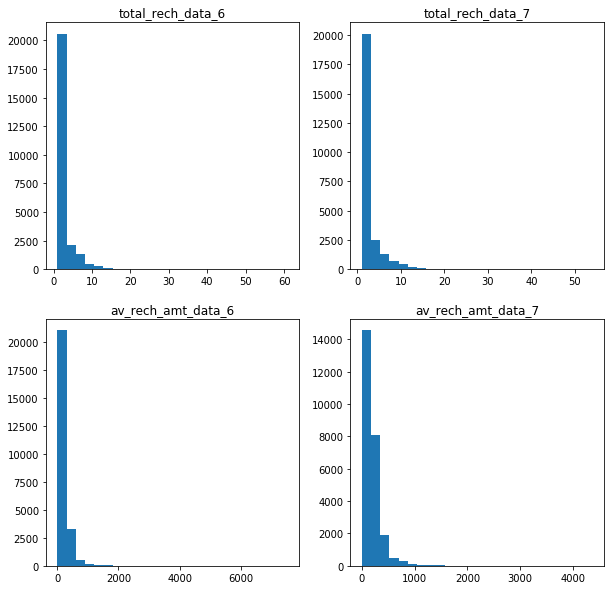

In [15]:
### Let us look at the distribution to find out the value to fill
### total_rech_data_6
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(telecom_orig.total_rech_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(telecom_orig.total_rech_data_7.dropna(),bins=25)

# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(telecom_orig.av_rech_amt_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(telecom_orig.av_rech_amt_data_7.dropna(),bins=25)

In [16]:
# The minimum value is 1, and not zero, 
# The rows with missing values also have the 'dates of recharge' columns 
# missing -- indicating that no recharge was done in this month. 
# Thus, missing values can be imputed with 0.

telecom_orig.total_rech_data_6.fillna(value=0, inplace=True)
telecom_orig.total_rech_data_7.fillna(value=0, inplace=True)
telecom_orig.total_rech_data_8.fillna(value=0, inplace=True)
telecom_orig.total_rech_data_9.fillna(value=0, inplace=True)

telecom_orig.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom_orig.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom_orig.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom_orig.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [17]:
###Moving on to the next set
## Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom_orig.isnull().sum()/len(telecom_orig.index)), 2)
print(colmns_missing_data[colmns_missing_data >= 70])

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
dtype: float64


In [18]:
#date_of_last_rech_data,max_rech_data,count_rech_2g,arpu_3g,night_pck_user,fb_user was handled in total_rech_data set to 0 
#as there was no recharge
#So lets drop this data as this is has redundant and even if we impute some data it can cause some noice to our prediction

drop_missing_values_columns = colmns_missing_data[colmns_missing_data > 70].index
print(len(drop_missing_values_columns))
telecom_orig.drop(drop_missing_values_columns, axis=1, inplace=True)

print(telecom_orig.shape)
print(telecom_orig.describe)

24
(99999, 70)
<bound method NDFrame.describe of        mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  total_og_mou_6  \
0         7000842753   197.385   214.816   213.803   21.100            0.00   
1         7001865778    34.047   355.074   268.321   86.285           40.31   
2         7001625959   167.690   189.058   210.226  290.714          155.33   
3         7001204172   221.338   251.102   508.054  389.500          223.23   
4         7000142493   261.636   309.876   238.174  163.426          127.28   
5         7000286308    50.258    58.810    83.386  170.826           69.44   
6         7001051193   429.023   190.704   255.114  114.751          333.76   
7         7000701601  1069.180  1349.850  3171.480  500.000          487.53   
8         7001524846   378.721   492.223   137.362  166.787          508.36   
9         7001864400   119.518   247.435   170.231  160.042           98.04   
10        7000471350     0.400     0.000   281.858   82.638            0.13   
11 

### Step 2: Filter High-Value Customers

In [19]:
#Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, 
#where X is the 70th percentile of the average recharge amount in the first two months


telecom_orig["total_rech_data_amt_6"] = telecom_orig["total_rech_data_6"]*telecom_orig['av_rech_amt_data_6']
telecom_orig["total_rech_data_amt_7"] = telecom_orig["total_rech_data_7"]*telecom_orig['av_rech_amt_data_7']
telecom_orig["total_rech_data_amt_8"] = telecom_orig["total_rech_data_8"]*telecom_orig['av_rech_amt_data_8']
telecom_orig["total_rech_data_amt_9"] = telecom_orig["total_rech_data_9"]*telecom_orig['av_rech_amt_data_9']


avg_rech_amt_6_7 = (telecom_orig["total_rech_amt_6"] + telecom_orig["total_rech_data_amt_6"] + 
                      telecom_orig["total_rech_amt_7"] + telecom_orig["total_rech_data_amt_7"]) / 2.0
amont_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('the 70th percentile of the average recharge amount in the first two months (the good phase): ', amont_70_pc)

telecom_orig = telecom_orig[avg_rech_amt_6_7 >= amont_70_pc]

# We can drop total_rech_data_* and av_rech_amt_data_*
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
drop_data_columns.append("sep_vbc_3g")
telecom_orig.drop(drop_data_columns, axis=1, inplace=True)

print('Dataframe Shape: ', telecom_orig.shape)

the 70th percentile of the average recharge amount in the first two months (the good phase):  478.0
Dataframe Shape:  (30001, 65)


### Step3:Identify tag churners 

In [20]:
#Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
#total_ic_mou_9
#total_og_mou_9
#vol_2g_mb_9
#vol_3g_mb_9

# Identify Churn
X = telecom_orig["total_ic_mou_9"] + telecom_orig["total_og_mou_9"] + telecom_orig["vol_2g_mb_9"] + telecom_orig["vol_3g_mb_9"]
telecom_orig["churn"] = np.where(X, 0, 1)
telecom_orig["churn"].head(10)
print(telecom_orig.columns)

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'last_day_rch_amt_9', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'

In [21]:
# Columns to be dropped: all columns ending with "_9"
drop_fourth_month_columns = [hdr for hdr in list(telecom_orig) if hdr.endswith("_9")]
telecom_orig.drop(drop_fourth_month_columns, axis=1, inplace=True)
print('Number of columns droped here  = ', len(drop_fourth_month_columns))
print('Dataframe Shape: ', telecom_orig.shape);

Number of columns droped here  =  15
Dataframe Shape:  (30001, 51)


In [22]:
round(100*(telecom_orig.isnull().sum()/len(telecom_orig.index)), 2)

mobile_number            0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
total_og_mou_6           0.0
total_og_mou_7           0.0
total_og_mou_8           0.0
total_ic_mou_6           0.0
total_ic_mou_7           0.0
total_ic_mou_8           0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
vol_2g_mb_6              0.0
vol_2g_mb_7              0.0
vol_2g_mb_8              0.0
vol_3g_mb_6              0.0
vol_3g_mb_7              0.0
vol_3g_mb_8              0.0
monthly_2g_6             0.0
monthly_2g_7             0.0
monthly_2g_8             0.0
sachet_2g_6              0.0
sachet_2g_7              0.0
sachet_2g_8              0.0
monthly_3g_6  

### Step 4: Lets check the correlation with heat map

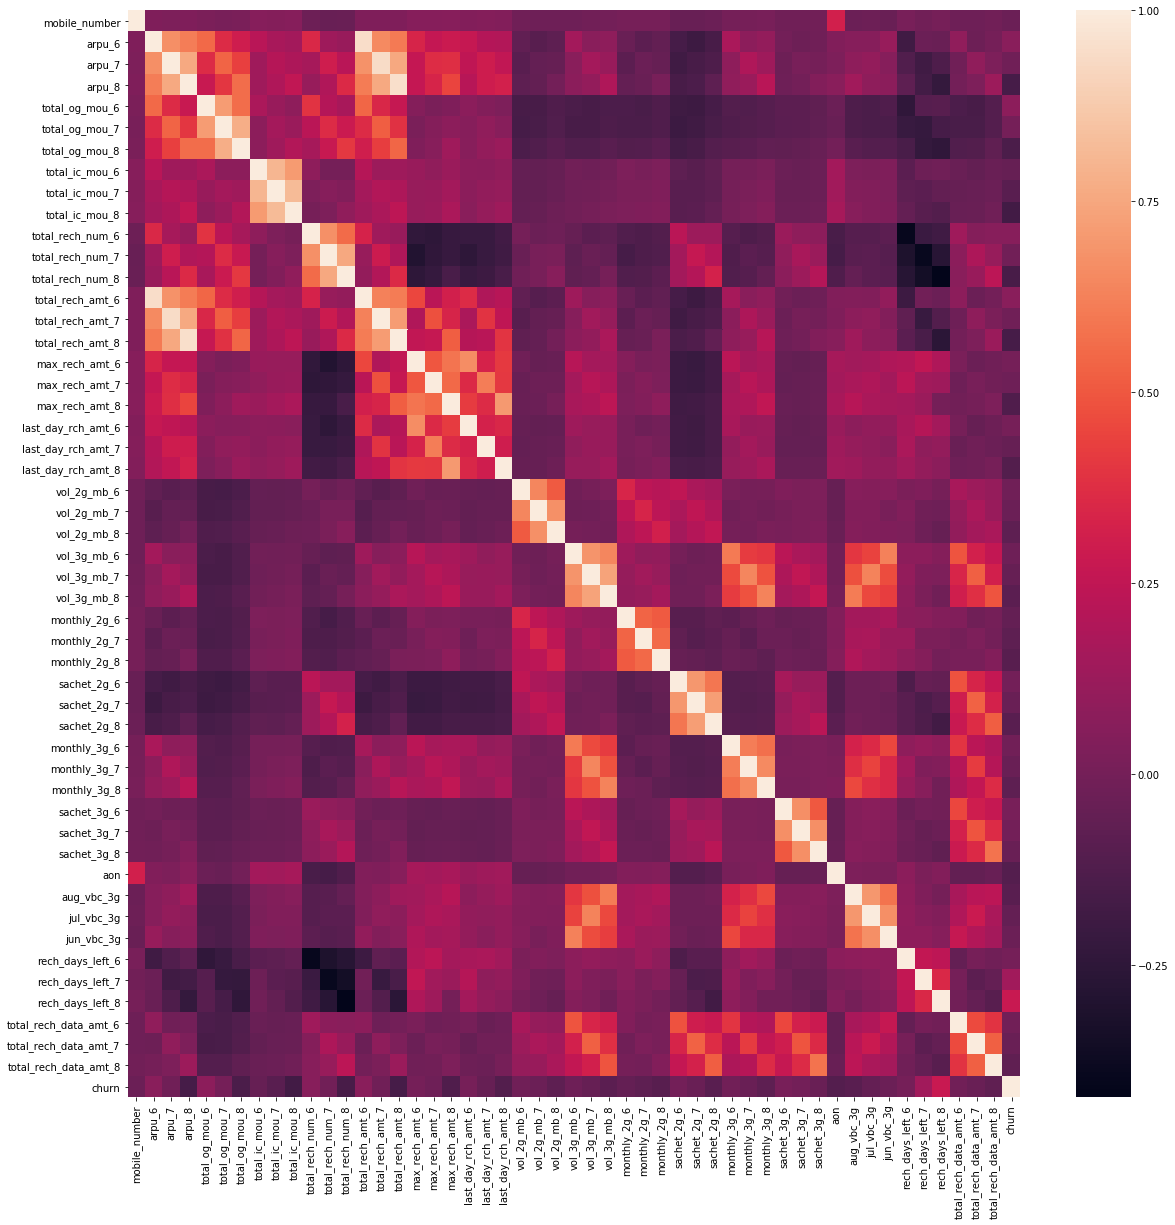

In [23]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(telecom_orig.corr())

### Step 5: Now lets split X and Y(CHURN)

In [24]:
X_vars = telecom_orig.drop(['churn'],axis=1)
y_vars = telecom_orig['churn']

### Step 6: Lets standardize the data and split into test and training set

In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


X_scaler = preprocessing.StandardScaler().fit(X_vars)

X_scaled = X_scaler.transform(X_vars)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_vars, train_size=0.7,random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Step 7: Apply PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
df_train_pca = pca.fit_transform(X_train)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(21000, 50)
(9001, 50)


### Step 8: Apply logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(df_train_pca, y_train)

# Predicted probabilities
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[8194  106]
 [ 495  206]]


In [35]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))

LogisticRegression accuracy with PCA:  0.9332296411509832


In [37]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_fit',
 '_fit_full',
 '_fit_truncated',
 '_get_param_names',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values_',
 'svd_solver',
 'tol',
 'transform',
 'whiten